# Modular Burgers Test v2

In this notebook, we will be testing the modular Burger's equation solver.


In [1]:
import sys, os
neural_dir = r"C:\neuralOperator\solvers"
sys.path.append(neural_dir)
from solvers import *

import numpy as np
import matplotlib.pyplot as plt


solvers file:	c:\neuralOperator\solvers\solvers.py
Library directory:	C:\neuralOperator\solvers\lib
Before import from distributedFunctions
After import from distributedFunctions


## Introduction

Part of our neural operator project was producing a modular solver that does not inherently require the standard or Euclidean spatial discretization to operate. Thus, I will be working through a Burger's equation problem to show how the new solver works.


## Problem Setup

To set up the problem, we will have an x-domain from [-1, 1] with a dual-sine initialized state.


In [2]:
N_x = 1000
x_domain = np.linspace(-1, 1, N_x)


In [3]:
u_0 = np.sin( 2* np.pi * x_domain ) - 2 * np.sin( np.pi * x_domain )


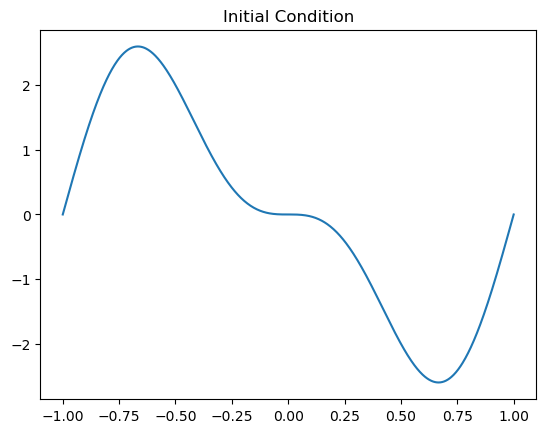

In [4]:
plt.plot( x_domain, u_0 )

plt.title("Initial Condition")
plt.show()


# Burger's Equation Object

Part of how the solver is set up is to let the Burger's equation as an object. We initialize it and then we can call it, which allows the time stepping object to use an object specific to a problem.


In [5]:
burgers_test = burgers_eqn( spatial_order=6, viscid=False )


Spatial order is 6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


In [6]:
BC_set = ( ["periodic", "periodic"], [None, None], [None, None] )


In [7]:
du_dt_0 = burgers_test( x_domain, u_0, [0] , BC_set)


c:\Users\User\.conda\envs\neuralOperator\lib\site-packages\scipy\sparse\_index.py:155: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\User\.conda\envs\neuralOperator\lib\site-packages\scipy\sparse\_index.py:197: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
c:\Users\User\.conda\envs\neuralOperator\lib\site-packages\scipy\sparse\_base.py:1068: SparseEfficiencyWarning: Constructing a DIA matrix with 1999 diagonals is inefficient
  return self.tocoo(copy=copy).todia(copy=False)


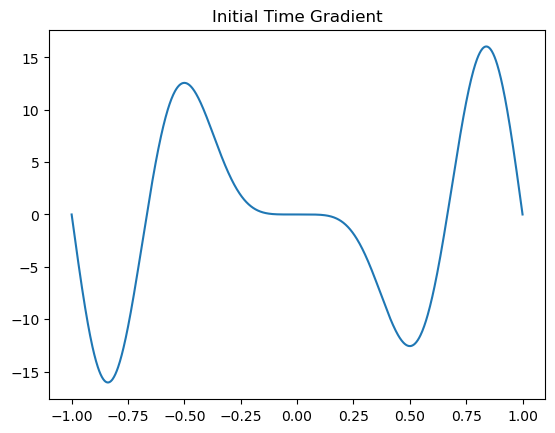

In [8]:
plt.plot( x_domain, du_dt_0 )

plt.title("Initial Time Gradient")
plt.show()


And this looks right for the initial condition we have.


## Time Stepping

Now, we can introduce our equation object to the time stepping object.


In [9]:
stepper_test = explicitEuler( burgers_test, x_domain, u_0, (0, 0.15), 100e-6, [0], BC_set, C=0.5 )


In [10]:
stepper_test.solve()


Time: 0
	Maximum Courant Number: 0.12977262415437857
Checking Courant Number
Time: 0.0001
	Maximum Courant Number: 0.1297732897380259
Checking Courant Number
Time: 0.0002
	Maximum Courant Number: 0.12977378273721651
Checking Courant Number
Time: 0.00030000000000000003
	Maximum Courant Number: 0.12977410306186213
Checking Courant Number
Time: 0.0004
	Maximum Courant Number: 0.12977425062496836
Checking Courant Number
Time: 0.0005
	Maximum Courant Number: 0.12977422534264105
Checking Courant Number
Time: 0.0006000000000000001
	Maximum Courant Number: 0.12977402713409167
Checking Courant Number
Time: 0.0007000000000000001
	Maximum Courant Number: 0.12977365592164364
Checking Courant Number
Time: 0.0008000000000000001
	Maximum Courant Number: 0.1297735027891638
Checking Courant Number
Time: 0.0009000000000000002
	Maximum Courant Number: 0.12977411795742105
Checking Courant Number
Time: 0.0010000000000000002
	Maximum Courant Number: 0.12977456048708366
Checking Courant Number
Time: 0.001100

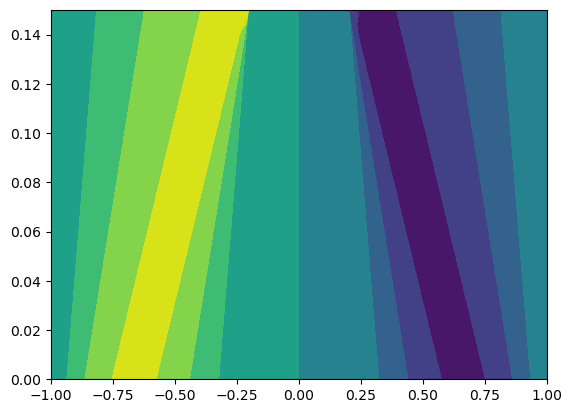

In [11]:
plt.contourf( x_domain, stepper_test.t, stepper_test.u )


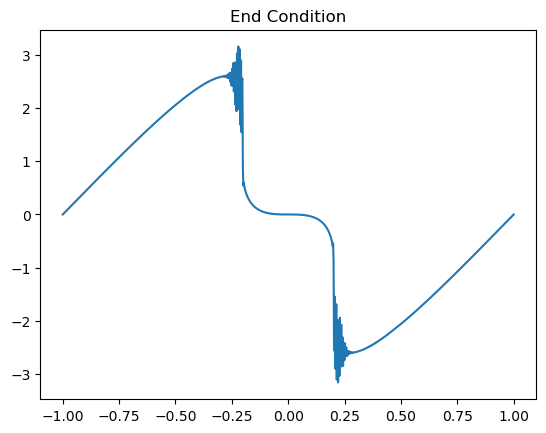

In [12]:
plt.plot( x_domain, stepper_test.u[-1] )

plt.title("End Condition")
plt.show()


## Integrated Object

We also created an object that can handle all of this within itself. So, does it work?


In [16]:
burgers_integrated = burgers1D( x_domain, u_0, (0, 0.15), dt=100e-6, spatial_order=6 )


Spatial order is 6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


In [17]:
burgers_integrated.solve()


Solving the 1D problem.
Time: 0
	Maximum Courant Number: 0.12977262415437857
Time: 0.0001
	Maximum Courant Number: 0.1297732897380259
Time: 0.0002
	Maximum Courant Number: 0.12977378273721651
Time: 0.00030000000000000003
	Maximum Courant Number: 0.12977410306186213
Time: 0.0004
	Maximum Courant Number: 0.12977425062496836
Time: 0.0005
	Maximum Courant Number: 0.12977422534264105
Time: 0.0006000000000000001
	Maximum Courant Number: 0.12977402713409167
Time: 0.0007000000000000001
	Maximum Courant Number: 0.12977365592164364
Time: 0.0008000000000000001
	Maximum Courant Number: 0.1297735027891638
Time: 0.0009000000000000002
	Maximum Courant Number: 0.12977411795742105
Time: 0.0010000000000000002
	Maximum Courant Number: 0.12977456048708366
Time: 0.0011000000000000003
	Maximum Courant Number: 0.12977483029425435
Time: 0.0012000000000000003
	Maximum Courant Number: 0.12977492729814102
Time: 0.0013000000000000004
	Maximum Courant Number: 0.1297748514210624
Time: 0.0014000000000000004
	Maximum

c:\Users\User\.conda\envs\neuralOperator\lib\site-packages\scipy\sparse\_index.py:155: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\User\.conda\envs\neuralOperator\lib\site-packages\scipy\sparse\_index.py:197: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
c:\Users\User\.conda\envs\neuralOperator\lib\site-packages\scipy\sparse\_base.py:1068: SparseEfficiencyWarning: Constructing a DIA matrix with 1999 diagonals is inefficient
  return self.tocoo(copy=copy).todia(copy=False)


Time: 0.0015000000000000005
	Maximum Courant Number: 0.12977418072887126
Time: 0.0016000000000000005
	Maximum Courant Number: 0.1297743668388933
Time: 0.0017000000000000006
	Maximum Courant Number: 0.12977493153946293
Time: 0.0018000000000000006
	Maximum Courant Number: 0.12977532355062293
Time: 0.0019000000000000006
	Maximum Courant Number: 0.1297755427946766
Time: 0.0020000000000000005
	Maximum Courant Number: 0.1297755891970428
Time: 0.0021000000000000003
	Maximum Courant Number: 0.12977546268626142
Time: 0.0022
	Maximum Courant Number: 0.12977516319399812
Time: 0.0023
	Maximum Courant Number: 0.1297746906550494
Time: 0.0024
	Maximum Courant Number: 0.1297752162694111
Time: 0.0024999999999999996
	Maximum Courant Number: 0.12977573045138005
Time: 0.0025999999999999994
	Maximum Courant Number: 0.12977607189645643
Time: 0.0026999999999999993
	Maximum Courant Number: 0.1297762405331531
Time: 0.002799999999999999
	Maximum Courant Number: 0.12977623629310825
Time: 0.002899999999999999
	Ma

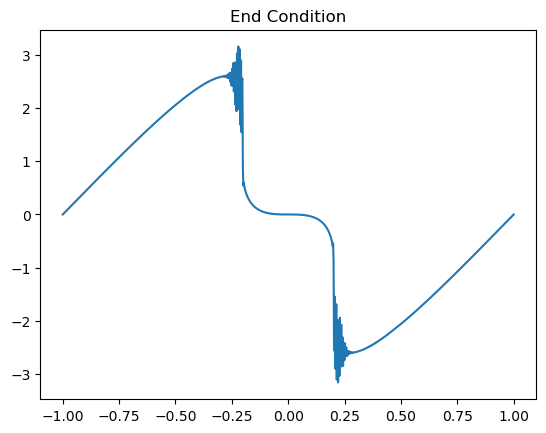

In [18]:
plt.plot( x_domain, burgers_integrated.u[-1] )

plt.title("End Condition")
plt.show()
